In [1]:
import pandas as pd

# reading csv file
first_df = pd.read_csv('raw_data/shown_tract_allCharacteristics.csv')

# dropping unnessary columns
first_df = first_df.drop(['Job_Growth_Rate_from_2004_to_2013', 'Median_Hhold._Income_of_Residents_in_1990', 'Fraction_Non-White_in_2010','Foreign-Born_Share_in_2012-16','Fraction_Single_Parents_in_2012-16','Population_Density_in_2010','Density_of_Jobs_in_2013','Census_Response_Rate_Social_Capital_Proxy'], axis=1)
first_df.head()

,tract,Name,Median_Rent_2012-16,Median_Hhold._Income_of_Residents_in_2012-16,Poverty_Rate_in_2012-16,Fraction_College_Graduates_in_2012-16,Fraction_with_Short_Work_Commutes_in_2012-16
0,17031010100,"Rogers Park, Chicago, IL",872.0,29489.0,0.3540,0.3494,0.1337
1,17031010201,"Rogers Park, Chicago, IL",1012.0,38377.0,0.3532,0.3188,0.1098
2,17031010202,"Rogers Park, Chicago, IL",951.0,29065.0,0.2320,0.3671,0.1311
3,17031010300,"Rogers Park, Chicago, IL",897.0,37048.0,0.1749,0.3619,0.0878
4,17031010400,"Rogers Park, Chicago, IL",977.0,36764.0,0.1755,0.6820,0.2055


In [2]:
# empty list to store the list from the data
IL_state_city = []
# copy of the dataframe
copy_df = first_df
# loop to extract the state from the dataframe we created before
for index, row in first_df.iterrows():
    state = row["Name"].split(", ")
    if "IL" in state:
        IL_state_city.append(state[0])
    else:
        copy_df.drop(index,inplace=True)
# creating new column city 
copy_df["city"] = IL_state_city
# renaming the column names
copy_df.rename(columns={'Median_Rent_2012-16': 'Median_Rent', 
                        'Median_Hhold._Income_of_Residents_in_2012-16': 'Median_Hhold_Income',
                        'Poverty_Rate_in_2012-16':'Poverty_Rate',
                        'Fraction_College_Graduates_in_2012-16':'College_Graduates',
                        'Fraction_with_Short_Work_Commutes_in_2012-16':'Short_Work_Commutes',
                        }, inplace=True)
copy_df.head()
        

,tract,Name,Median_Rent,Median_Hhold_Income,Poverty_Rate,College_Graduates,Short_Work_Commutes,city
0,17031010100,"Rogers Park, Chicago, IL",872.0,29489.0,0.3540,0.3494,0.1337,Rogers Park
1,17031010201,"Rogers Park, Chicago, IL",1012.0,38377.0,0.3532,0.3188,0.1098,Rogers Park
2,17031010202,"Rogers Park, Chicago, IL",951.0,29065.0,0.2320,0.3671,0.1311,Rogers Park
3,17031010300,"Rogers Park, Chicago, IL",897.0,37048.0,0.1749,0.3619,0.0878,Rogers Park
4,17031010400,"Rogers Park, Chicago, IL",977.0,36764.0,0.1755,0.6820,0.2055,Rogers Park


In [4]:
filtered_df = copy_df[copy_df['Name'].str.contains('Chicago, IL', case=False, na=False)].dropna()
filtered_df['city'].unique()



array(['Rogers Park', 'West Ridge', 'West Rogers Park', 'Peterson Park',
       'Edgewater', 'Magnolia Glen', 'Edgewater Beach', 'Uptown',
       'Lincoln Square', 'Budlong Woods', 'North Center',
       'Roscoe Village', 'West Lakeview', 'Lake View', 'Wrigleyville',
       'Lake View East', 'Boystown', 'Lincoln Park', 'Gold Coast',
       'Near North Side', 'Old Town', 'Near North', 'Streeterville',
       'River North', 'Cabrini-Green', 'Edison Park', 'Norwood Park',
       'Jefferson Park', 'Gladstone Park', 'Edgebrook', 'Forest Glen',
       'Pulaski Park', 'North Park', 'Hollywood Park', 'Albany Park',
       'Portage Park', 'Cragin', 'Irving Park', 'Old Irving Park',
       'Irving Park East', 'Kilbourn Park', 'Dunning', 'Belmont Heights',
       'Montclare', 'Belmont Cragin', 'Belmont Central',
       'Belmont Gardens', 'Hermosa', 'Avondale', 'Logan Square',
       'Bucktown', 'Humboldt Park', 'East Garfield Park', 'West Town',
       'Noble Square', 'Ukrainian Village', 'Austin

In [5]:
filtered_df.head()

,tract,Name,Median_Rent,Median_Hhold_Income,Poverty_Rate,College_Graduates,Short_Work_Commutes,city
0,17031010100,"Rogers Park, Chicago, IL",872.0,29489.0,0.3540,0.3494,0.1337,Rogers Park
1,17031010201,"Rogers Park, Chicago, IL",1012.0,38377.0,0.3532,0.3188,0.1098,Rogers Park
2,17031010202,"Rogers Park, Chicago, IL",951.0,29065.0,0.2320,0.3671,0.1311,Rogers Park
3,17031010300,"Rogers Park, Chicago, IL",897.0,37048.0,0.1749,0.3619,0.0878,Rogers Park
4,17031010400,"Rogers Park, Chicago, IL",977.0,36764.0,0.1755,0.6820,0.2055,Rogers Park


In [6]:
chi_suburbs_df = copy_df[~copy_df['Name'].str.contains('Chicago', case= False, na=False)]
chi_suburbs_df['area'] = 'Chicago Suburbs'
chi_suburbs_df.head()

C:\Users\binod\AppData\Local\Temp\ipykernel_14176\2967683729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chi_suburbs_df['area'] = 'Chicago Suburbs'


,tract,Name,Median_Rent,Median_Hhold_Income,Poverty_Rate,College_Graduates,Short_Work_Commutes,city,area
684,17031770201,"Elk Grove Village, IL",992.0,59365.0,0.0876,0.3738,0.2688,Elk Grove Village,Chicago Suburbs
685,17031770202,"Elk Grove Village, IL",1887.0,51348.0,0.0436,0.3057,0.3178,Elk Grove Village,Chicago Suburbs
686,17031770300,"Elk Grove Village, IL",1158.0,65298.0,0.0402,0.2798,0.2840,Elk Grove Village,Chicago Suburbs
687,17031770400,"Elk Grove Village, IL",948.0,60569.0,0.1101,0.2762,0.2866,Elk Grove Village,Chicago Suburbs
688,17031770500,"Des Plaines, IL",884.0,43325.0,0.2483,0.1066,0.3024,Des Plaines,Chicago Suburbs


In [7]:
west = filtered_df.loc[filtered_df['city'].isin([
'Humboldt Park', 'East Garfield Park', 'West Garfield Park', 'West Town', 'Noble Square', 
'Ukrainian Village', 'Austin', 'South Austin', 'Near West Side', 'Garfield Park', 
'East Garfield Park', 'West Garfield Park', 'Lawndale', 'North Lawndale', 'Little Village', 'South Lawndale', 
'Douglas Park', 'Marshall Square','West Humboldt Park', 'Cragin', 'Fulton River District', 'University Village / Little Italy', 
'Illinois Medical District', 'Clearing', 'Garfield Ridge', 'Archer Heights', 'Brighton Park', 'McKinley Park'
])]
west['area'] = 'Chicago West Side'
west
#'Lawndale', 'Garfield Park', 'East Garfield Park', 'South Austin', 'North Lawndale', 'Little Village'

# 'Humboldt Park', 'East Garfield Park', 'West Garfield Park', 'West Town', 'Noble Square', 
# 'Ukrainian Village', 'Austin', 'South Austin', 'Near West Side', 'Garfield Park', 
# 'East Garfield Park', 'West Garfield Park', 'Lawndale', 'North Lawndale', 'Little Village', 'South Lawndale', 
# 'Douglas Park', 'Marshall Square','West Humboldt Park'

C:\Users\binod\AppData\Local\Temp\ipykernel_14176\3631165326.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  west['area'] = 'Chicago West Side'


,tract,Name,Median_Rent,Median_Hhold_Income,Poverty_Rate,College_Graduates,Short_Work_Commutes,city,area
186,17031151001,"Cragin, Chicago, IL",925.0,47058.0,0.2523,0.1954,0.0590,Cragin,Chicago West Side
187,17031151002,"Cragin, Chicago, IL",894.0,48539.0,0.1239,0.1769,0.0501,Cragin,Chicago West Side
269,17031230100,"Humboldt Park, Chicago, IL",935.0,52175.0,0.2675,0.3350,0.1078,Humboldt Park,Chicago West Side
270,17031230200,"Humboldt Park, Chicago, IL",954.0,43172.0,0.2390,0.0791,0.0863,Humboldt Park,Chicago West Side
271,17031230300,"Humboldt Park, Chicago, IL",835.0,41914.0,0.1705,0.1234,0.0597,Humboldt Park,Chicago West Side
...,...,...,...,...,...,...,...,...,...
1243,17031843000,"Lawndale, Chicago, IL",822.0,16983.0,0.5196,0.0873,0.0864,Lawndale,Chicago West Side
1244,17031843100,"Lawndale, Chicago, IL",917.0,27651.0,0.3992,0.1609,0.0724,Lawndale,Chicago West Side
1246,17031843300,"Douglas Park, Chicago, IL",918.0,36888.0,0.4642,0.1314,0.1146,Douglas Park,Chicago West Side
1247,17031843400,"Lawndale, Chicago, IL",702.0,24576.0,0.3649,0.1050,0.0830,Lawndale,Chicago West Side


In [8]:
south = filtered_df.loc[filtered_df['city']== 'South Side']
south.head()

,tract,Name,Median_Rent,Median_Hhold_Income,Poverty_Rate,College_Graduates,Short_Work_Commutes,city
391,17031340300,"South Side, Chicago, IL",687.0,31478.0,0.2889,0.1857,0.1991,South Side
407,17031381400,"South Side, Chicago, IL",925.0,33899.0,0.2886,0.1353,0.1814,South Side
410,17031381800,"South Side, Chicago, IL",996.0,32095.0,0.2926,0.2281,0.1043,South Side
411,17031381900,"South Side, Chicago, IL",740.0,31208.0,0.2570,0.2943,0.0497,South Side
413,17031390200,"South Side, Chicago, IL",993.0,44289.0,0.1720,0.5433,0.1338,South Side


In [9]:
north = filtered_df.loc[filtered_df['city'].isin(['Rogers Park', 'West Ridge', 'West Rogers Park', 'Peterson Park', 'Edgewater', 'Magnolia Glen', 'Edgewater Beach', 'Uptown',
'Lincoln Square', 'Budlong Woods', 'North Center', 'Roscoe Village', 'West Lakeview', 'Lake View', 'Wrigleyville', 'Lake View East',
'Boystown', 'Lincoln Park', 'Edison Park', 'Norwood Park', 'Jefferson Park', 'Gladstone Park', 'Edgebrook', 'Forest Glen', 
'Pulaski Park', 'North Park', 'Hollywood Park', 'Albany Park', 'Irving Park', 'Old Irving Park', 'Irving Park East', 'Kilbourn Park',
'Dunning', 'Belmont Heights', 'Montclare', 'Belmont Cragin', 'Belmont Central', 'Belmont Gardens', 'Hermosa', 'Avondale', 'Logan Square', 'Bucktown', "O'Hare", 'Portage Park'])]
north['area'] = 'Chicago North Side'
north

# 'Rogers Park', 'West Ridge', 'West Rogers Park', 'Peterson Park', 'Edgewater', 'Magnolia Glen', 'Edgewater Beach', 'Uptown',
# 'Lincoln Square', 'Budlong Woods', 'North Center', 'Roscoe Village', 'West Lakeview', 'Lake View', 'Wrigleyville', 'Lake View East',
# 'Boystown', 'Lincoln Park', 'Edison Park', 'Norwood Park', 'Jefferson Park', 'Gladstone Park', 'Edgebrook', 'Forest Glen', 
# 'Pulaski Park', 'North Park', 'Hollywood Park', 'Albany Park', 'Irving Park', 'Old Irving Park', 'Irving Park East', 'Kilbourn Park',
# 'Dunning', 'Belmont Heights', 'Montclare', 'Belmont Cragin', 'Belmont Central', 'Belmont Gardens', 'Hermosa', 'Avondale', 'Logan Square', 'Bucktown'

C:\Users\binod\AppData\Local\Temp\ipykernel_14176\669223513.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  north['area'] = 'Chicago North Side'


,tract,Name,Median_Rent,Median_Hhold_Income,Poverty_Rate,College_Graduates,Short_Work_Commutes,city,area
0,17031010100,"Rogers Park, Chicago, IL",872.0,29489.0,0.3540,0.3494,0.1337,Rogers Park,Chicago North Side
1,17031010201,"Rogers Park, Chicago, IL",1012.0,38377.0,0.3532,0.3188,0.1098,Rogers Park,Chicago North Side
2,17031010202,"Rogers Park, Chicago, IL",951.0,29065.0,0.2320,0.3671,0.1311,Rogers Park,Chicago North Side
3,17031010300,"Rogers Park, Chicago, IL",897.0,37048.0,0.1749,0.3619,0.0878,Rogers Park,Chicago North Side
4,17031010400,"Rogers Park, Chicago, IL",977.0,36764.0,0.1755,0.6820,0.2055,Rogers Park,Chicago North Side
...,...,...,...,...,...,...,...,...,...
1161,17031832300,"Bucktown, Chicago, IL",1606.0,103913.0,0.0772,0.7426,0.0722,Bucktown,Chicago North Side
1162,17031832400,"Logan Square, Chicago, IL",1334.0,92302.0,0.1132,0.5559,0.1280,Logan Square,Chicago North Side
1163,17031832500,"Lincoln Park, Chicago, IL",1241.0,106470.0,0.1725,0.7334,0.1086,Lincoln Park,Chicago North Side
1164,17031832600,"Lincoln Park, Chicago, IL",1877.0,143339.0,0.0784,0.9172,0.1032,Lincoln Park,Chicago North Side


In [10]:
East = filtered_df.loc[filtered_df['city'].isin(['Streeterville', 'River North', 'Cabrini-Green', 'Near North Side',
'Old Town', 'Near North', 'Chicago Loop', 'South Loop',
'Near South Side', 'East Pilsen', 'Lower West Side',
'Heart of Chicago', 'Oakland', 'South Shore', 'East Side', 'Goose Island', 'Gold Coast'])]
East['area'] = 'Chicago East Side'
East
# 'Streeterville', 'River North', 'Cabrini-Green', 'Near North Side',
# 'Old Town', 'Near North', 'Chicago Loop', 'South Loop',
# 'Near South Side', 'East Pilsen', 'Lower West Side',
# 'Heart of Chicago', 'Oakland', 'South Shore', 'East Side'

C:\Users\binod\AppData\Local\Temp\ipykernel_14176\3168534006.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  East['area'] = 'Chicago East Side'


,tract,Name,Median_Rent,Median_Hhold_Income,Poverty_Rate,College_Graduates,Short_Work_Commutes,city,area
125,17031080100,"Gold Coast, Chicago, IL",1668.0,104178.0,0.0704,0.8202,0.1028,Gold Coast,Chicago East Side
126,17031080201,"Near North Side, Chicago, IL",1300.0,72176.0,0.0450,0.7113,0.0604,Near North Side,Chicago East Side
127,17031080202,"Gold Coast, Chicago, IL",1342.0,80122.0,0.0492,0.9114,0.1095,Gold Coast,Chicago East Side
128,17031080300,"Old Town, Chicago, IL",1761.0,109636.0,0.0996,0.8419,0.1256,Old Town,Chicago East Side
130,17031081000,"Near North, Chicago, IL",1082.0,41553.0,0.2425,0.5530,0.2588,Near North,Chicago East Side
131,17031081100,"Near North, Chicago, IL",1392.0,58094.0,0.2062,0.7293,0.1532,Near North,Chicago East Side
132,17031081201,"Streeterville, Chicago, IL",1793.0,85628.0,0.0789,0.8440,0.2078,Streeterville,Chicago East Side
133,17031081202,"Gold Coast, Chicago, IL",1368.0,99632.0,0.0326,0.7491,0.1601,Gold Coast,Chicago East Side
134,17031081300,"Streeterville, Chicago, IL",1502.0,86171.0,0.0940,0.8369,0.3164,Streeterville,Chicago East Side
135,17031081401,"Streeterville, Chicago, IL",1759.0,68853.0,0.1058,0.7366,0.2978,Streeterville,Chicago East Side


In [45]:
South = filtered_df.loc[filtered_df['city'].isin(['Douglas', 'Kenwood', 'Hyde Park', 'East Hyde Park', 'Park Manor', 'South Shore', 'Grand Crossing',
'East Chatham', 'South Chicago', 'Calumet Heights', 'Roseland', 'Longwood Manor', 'Fernwood', 'Cottage Grove Heights',
'South Deering', 'Jeffrey Manor', 'Golden Gate', 'West Englewood', 'Englewood', 'Greater Grand Crossing', 'Ashburn',
'Auburn Gresham', 'Beverly', 'Brainerd', 'Mount Greenwood', 'Morgan Park', 'Kennedy Park', 'Avalon Park', 'Princeton Park', 'Fuller Park', 'Armour Square',
'Bridgeport','Back of the Yards', 'Canaryville', 'Gage Park', 'Chicago Lawn', 'South Side', 'Bronzeville' ])]
South['area'] = 'Chicago South Side'
South

# 'Douglas', 'Kenwood', 'Hyde Park', 'East Hyde Park', 'Park Manor', 'South Shore', 'Grand Crossing',
# 'East Chatham', 'South Chicago', 'Calumet Heights', 'Roseland', 'Longwood Manor', 'Fernwood', 'Cottage Grove Heights',
# 'South Deering', 'Jeffrey Manor', 'Golden Gate', 'West Englewood', 'Englewood', 'Greater Grand Crossing', 'Ashburn',
# 'Auburn Gresham', 'Beverly', 'Brainerd', 'Mount Greenwood', 'Morgan Park', 'Kennedy Park', 'Avalon Park', 'Princeton Park', 'Fuller Park'

C:\Users\luzch\AppData\Local\Temp\ipykernel_26720\525404142.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,tract,Name,Median_Rent,Median_Hhold_Income,Poverty_Rate,College_Graduates,Short_Work_Commutes,city,area
391,17031340300,"South Side, Chicago, IL",687.0,31478.0,0.2889,0.1857,0.1991,South Side,Chicago South Side
392,17031340400,"Armour Square, Chicago, IL",838.0,32760.0,0.3548,0.2782,0.1661,Armour Square,Chicago South Side
393,17031340500,"Armour Square, Chicago, IL",598.0,20728.0,0.3181,0.2649,0.3097,Armour Square,Chicago South Side
394,17031340600,"Armour Square, Chicago, IL",304.0,11815.0,0.6158,0.0610,0.0245,Armour Square,Chicago South Side
395,17031350100,"Bronzeville, Chicago, IL",1057.0,41126.0,0.3105,0.6563,0.0398,Bronzeville,Chicago South Side
...,...,...,...,...,...,...,...,...,...
1239,17031842500,"Greater Grand Crossing, Chicago, IL",380.0,9367.0,0.6808,0.0821,0.0300,Greater Grand Crossing,Chicago South Side
1240,17031842600,"South Side, Chicago, IL",999.0,60252.0,0.1753,0.1545,0.1598,South Side,Chicago South Side
1249,17031843600,"South Side, Chicago, IL",1061.0,31392.0,0.3211,0.3430,0.1868,South Side,Chicago South Side
1251,17031843800,"South Side, Chicago, IL",1109.0,37586.0,0.2113,0.0794,0.1328,South Side,Chicago South Side


In [46]:
combined_df = pd.concat([north, East, west, South, chi_suburbs_df], ignore_index=True)
combined_df

,tract,Name,Median_Rent,Median_Hhold_Income,Poverty_Rate,College_Graduates,Short_Work_Commutes,city,area
0,17031010100,"Rogers Park, Chicago, IL",872.0,29489.0,0.3540,0.3494,0.1337,Rogers Park,Chicago North Side
1,17031010201,"Rogers Park, Chicago, IL",1012.0,38377.0,0.3532,0.3188,0.1098,Rogers Park,Chicago North Side
2,17031010202,"Rogers Park, Chicago, IL",951.0,29065.0,0.2320,0.3671,0.1311,Rogers Park,Chicago North Side
3,17031010300,"Rogers Park, Chicago, IL",897.0,37048.0,0.1749,0.3619,0.0878,Rogers Park,Chicago North Side
4,17031010400,"Rogers Park, Chicago, IL",977.0,36764.0,0.1755,0.6820,0.2055,Rogers Park,Chicago North Side
...,...,...,...,...,...,...,...,...,...
1444,17197881011,"Homer Glen, IL",1500.0,71537.0,0.0412,0.2286,0.1492,Homer Glen,Chicago Suburbs
1445,17197881012,"Lockport, IL",NaN,103280.0,0.0097,0.3867,0.1237,Lockport,Chicago Suburbs
1446,17197884101,"Romeoville, IL",1344.0,50828.0,0.0691,0.2487,0.3026,Romeoville,Chicago Suburbs
1447,17197884103,"Crest Hill, IL",1335.0,75835.0,0.0946,0.3203,0.1539,Crest Hill,Chicago Suburbs


In [47]:
# importing json file
copy_df.to_json('cleaned_data/cleaned_data.json')
# importing csv file
copy_df.to_csv('cleaned_data/cleaned_data.csv')
        

In [48]:
grouped_combined_df= combined_df.groupby('area').mean(numeric_only=True).drop(columns = ['tract']). round(2).sort_values('Median_Rent', ascending=True).reset_index()
grouped_combined_df


,area,Median_Rent,Median_Hhold_Income,Poverty_Rate,College_Graduates,Short_Work_Commutes
0,Chicago South Side,894.44,37768.83,0.29,0.22,0.12
1,Chicago West Side,986.45,43953.34,0.30,0.26,0.13
2,Chicago North Side,1128.69,65635.90,0.15,0.49,0.10
3,Chicago Suburbs,1220.39,75989.82,0.10,0.40,0.20
4,Chicago East Side,1238.34,63088.34,0.20,0.51,0.17


In [49]:
grouped_combined_df['area'].unique()

array(['Chicago South Side', 'Chicago West Side', 'Chicago North Side',
       'Chicago Suburbs', 'Chicago East Side'], dtype=object)

In [50]:
import plotly.express as px

df = px.data.gapminder()

fig = px.scatter(grouped_combined_df, x = 'College_Graduates', y= 'Median_Hhold_Income', size = 'Median_Rent', text = "area") 

fig.show()
# plot = copy_df.plot(kind= "bar",
#             x= 'city',
#             y= 'Median_Rent',
#             color= 'purple',
#             figsize= (100, 10),
#             alpha = 0.8,
#             legend = False,
#             title= 'Cities/ Chicago Neighborhoods Median Rent', 
#             xlabel = 'city/neighborhoods',
#             ylabel = 'Median Rent')
# plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
# plot

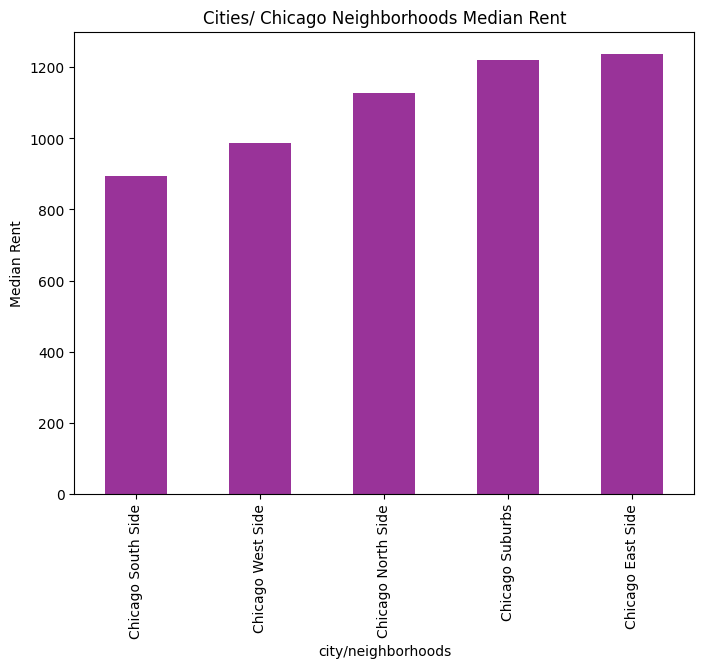

In [51]:
plot = grouped_combined_df.plot(kind= "bar",
            x= 'area',
            y= 'Median_Rent',
            color= 'purple',
            figsize= (8, 6),
            alpha = 0.8,
            legend = False,
            title= 'Cities/ Chicago Neighborhoods Median Rent', 
            xlabel = 'city/neighborhoods',
            ylabel = 'Median Rent')


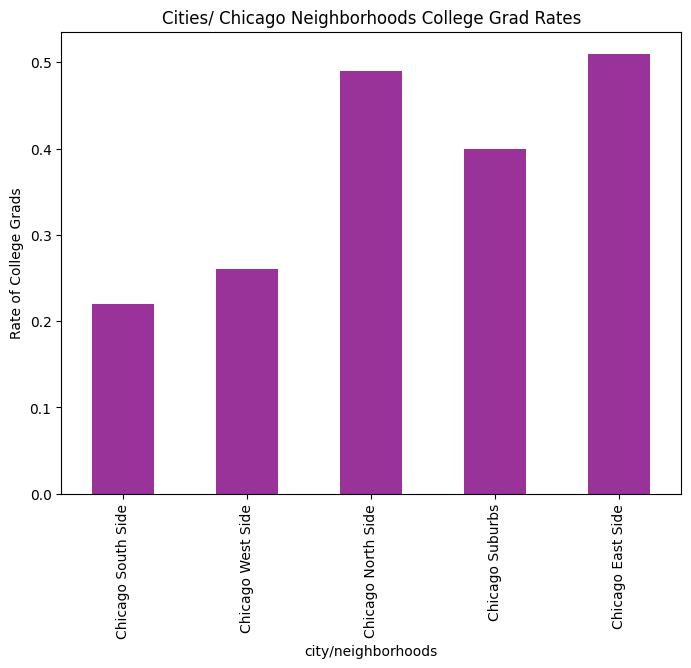

In [52]:
plot = grouped_combined_df.plot(kind= "bar",
            x= 'area',
            y= 'College_Graduates',
            color= 'purple',
            figsize= (8, 6),
            alpha = 0.8,
            legend = False,
            title= 'Cities/ Chicago Neighborhoods College Grad Rates', 
            xlabel = 'city/neighborhoods',
            ylabel = 'Rate of College Grads')

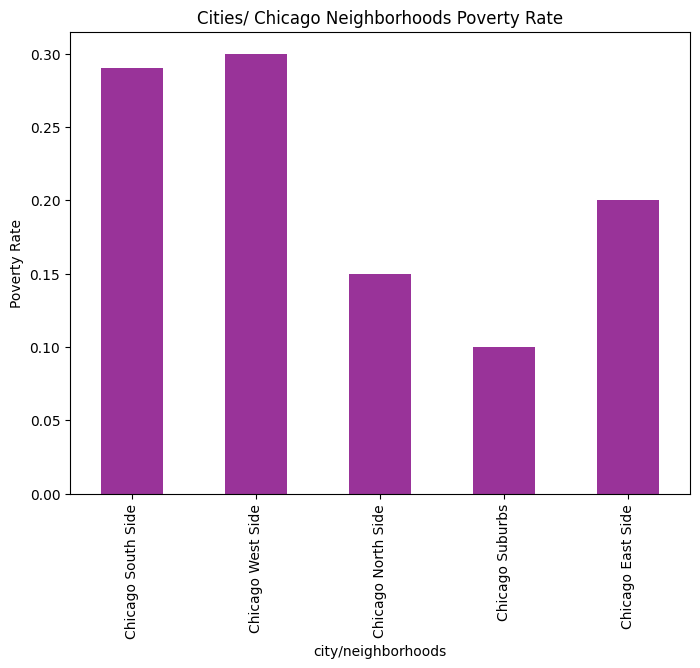

In [53]:
plot = grouped_combined_df.plot(kind= "bar",
            x= 'area',
            y= 'Poverty_Rate',
            color= 'purple',
            figsize= (8, 6),
            alpha = 0.8,
            legend = False,
            title= 'Cities/ Chicago Neighborhoods Poverty Rate', 
            xlabel = 'city/neighborhoods',
            ylabel = 'Poverty Rate')

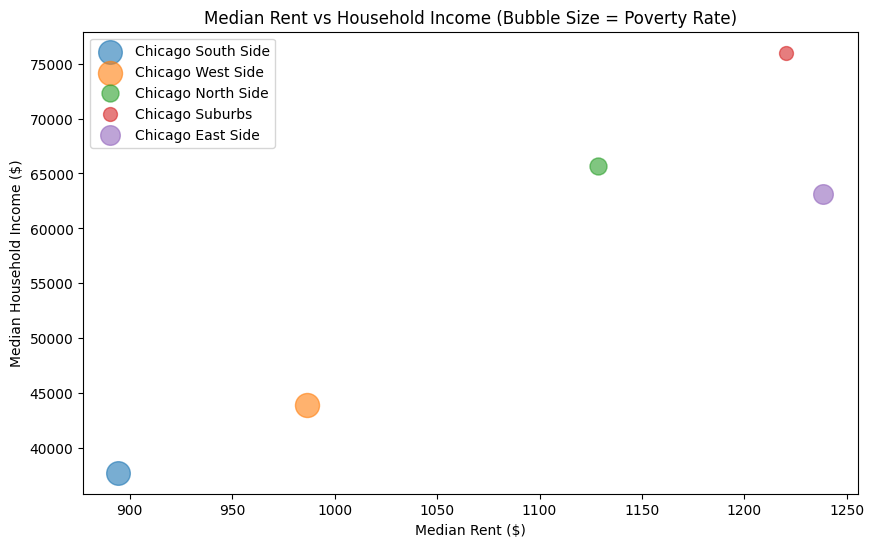

In [54]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))

grouped_combined_df['Bubble_Size'] = grouped_combined_df['Poverty_Rate'] * 1000

for index, row in grouped_combined_df.iterrows():
    ax.scatter(row['Median_Rent'], row['Median_Hhold_Income'], s=row['Bubble_Size'], label=row['area'], alpha=0.6)

ax.set_xlabel('Median Rent ($)')
ax.set_ylabel('Median Household Income ($)')
ax.set_title('Median Rent vs Household Income (Bubble Size = Poverty Rate)')
ax.legend()

plt.show()


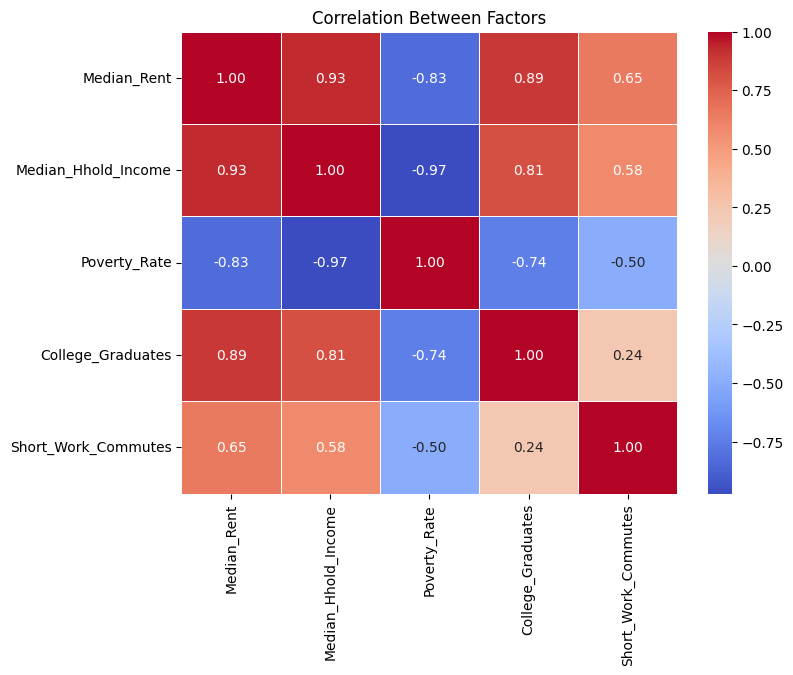

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = grouped_combined_df[['Median_Rent', 'Median_Hhold_Income', 'Poverty_Rate', 'College_Graduates', 'Short_Work_Commutes']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Factors')
plt.show()

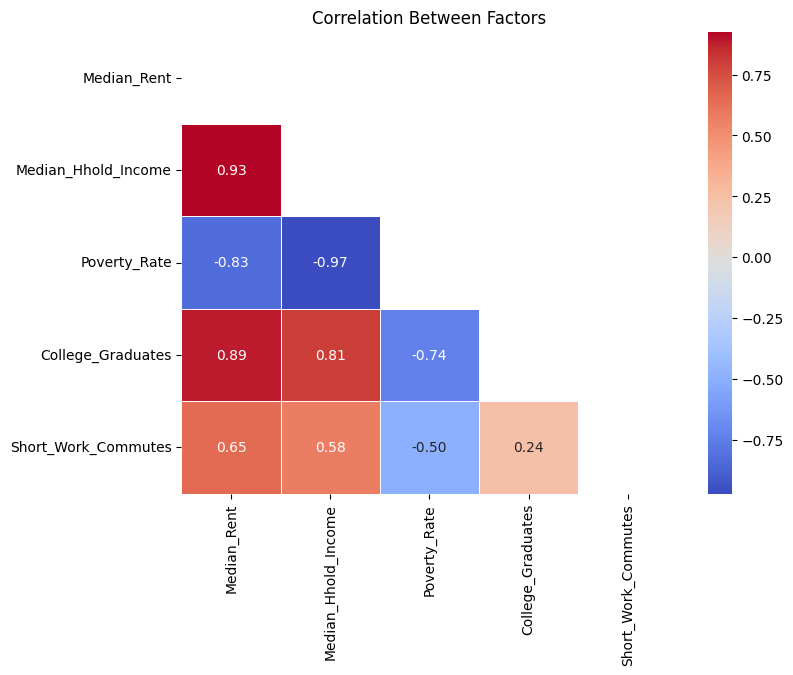

In [56]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr = grouped_combined_df[['Median_Rent', 'Median_Hhold_Income', 'Poverty_Rate', 'College_Graduates', 'Short_Work_Commutes']].corr()

# Create a mask to cover the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Titles and labels
plt.title('Correlation Between Factors')
plt.show()


In [1]:
neighborhoods = ['Rogers Park', 'West Ridge', 'West Rogers Park', 'Peterson Park',
       'Edgewater', 'Magnolia Glen', 'Edgewater Beach', 'Uptown',
       'Lincoln Square', 'Budlong Woods', 'North Center',
       'Roscoe Village', 'West Lakeview', 'Lake View', 'Wrigleyville',
       'Lake View East', 'Boystown', 'Lincoln Park', 'Gold Coast',
       'Near North Side', 'Old Town', 'Near North', 'Streeterville',
       'River North', 'Cabrini-Green', 'Edison Park', 'Norwood Park',
       'Jefferson Park', 'Gladstone Park', 'Edgebrook', 'Forest Glen',
       'Pulaski Park', 'North Park', 'Hollywood Park', 'Albany Park',
       'Portage Park', 'Cragin', 'Irving Park', 'Old Irving Park',
       'Irving Park East', 'Kilbourn Park', 'Dunning', 'Belmont Heights',
       'Montclare', 'Belmont Cragin', 'Belmont Central',
       'Belmont Gardens', 'Hermosa', 'Avondale', 'Logan Square',
       'Bucktown', 'Humboldt Park', 'East Garfield Park', 'West Town',
       'Noble Square', 'Ukrainian Village', 'Austin', 'South Austin',
       'Garfield Park', 'Fulton River District', 'Near West Side',
       'Lawndale', 'University Village / Little Italy', 'North Lawndale',
       'Douglas Park', 'Little Village', 'South Lawndale',
       'Marshall Square', 'East Pilsen', 'Lower West Side',
       'Heart of Chicago', 'Chicago Loop', 'South Loop',
       'Near South Side', 'South Side', 'Armour Square', 'Bronzeville',
       'Douglas', 'Kenwood', 'East Hyde Park', 'Hyde Park', 'Park Manor',
       'South Shore', 'Grand Crossing', 'East Chatham', 'South Chicago',
       'Calumet Heights', 'Roseland', 'Longwood Manor', 'Fernwood',
       'Cottage Grove Heights', 'South Deering', 'Jeffrey Manor',
       'East Side', 'Golden Gate', 'Garfield Ridge', 'Archer Heights',
       'Brighton Park', 'McKinley Park', 'Bridgeport',
       'Back of the Yards', 'Canaryville', 'Gage Park', 'Clearing',
       'Chicago Lawn', 'Englewood', 'Greater Grand Crossing', 'Ashburn',
       'Auburn Gresham', 'Beverly', 'Brainerd', 'Mount Greenwood',
       'Morgan Park', 'Kennedy Park', "O'Hare", 'Chicago',
       'West Humboldt Park', 'Princeton Park', 'Avalon Park',
       'Fuller Park', 'Oakland', 'Illinois Medical District',
       'Goose Island']

In [33]:
missing_neighborhoods = []
for neighborhood in neighborhoods:
    if neighborhood in combined_df['city'].values:
        print(f"{neighborhood} is present in DataFrame")
    else:
        # print(f"{neighborhood} is MISSING")
        missing_neighborhoods.append(neighborhood)

missing_neighborhoods


Rogers Park is present in DataFrame
West Ridge is present in DataFrame
West Rogers Park is present in DataFrame
Peterson Park is present in DataFrame
Edgewater is present in DataFrame
Magnolia Glen is present in DataFrame
Edgewater Beach is present in DataFrame
Uptown is present in DataFrame
Lincoln Square is present in DataFrame
Budlong Woods is present in DataFrame
North Center is present in DataFrame
Roscoe Village is present in DataFrame
West Lakeview is present in DataFrame
Lake View is present in DataFrame
Wrigleyville is present in DataFrame
Lake View East is present in DataFrame
Boystown is present in DataFrame
Lincoln Park is present in DataFrame
Near North Side is present in DataFrame
Old Town is present in DataFrame
Near North is present in DataFrame
Streeterville is present in DataFrame
River North is present in DataFrame
Cabrini-Green is present in DataFrame
Edison Park is present in DataFrame
Norwood Park is present in DataFrame
Jefferson Park is present in DataFrame
Glad

['Gold Coast', 'Portage Park', 'Chicago']

In [35]:

missing = filtered_df.loc[filtered_df['city'].isin(['Gold Coast', 'Portage Park', 'Chicago'])]
missing

,tract,Name,Median_Rent,Median_Hhold_Income,Poverty_Rate,College_Graduates,Short_Work_Commutes,city
125,17031080100,"Gold Coast, Chicago, IL",1668.0,104178.0,0.0704,0.8202,0.1028,Gold Coast
127,17031080202,"Gold Coast, Chicago, IL",1342.0,80122.0,0.0492,0.9114,0.1095,Gold Coast
133,17031081202,"Gold Coast, Chicago, IL",1368.0,99632.0,0.0326,0.7491,0.1601,Gold Coast
177,17031150200,"Portage Park, Chicago, IL",961.0,64327.0,0.1483,0.3454,0.0892,Portage Park
178,17031150300,"Portage Park, Chicago, IL",1098.0,70578.0,0.1270,0.3875,0.0602,Portage Park
179,17031150401,"Portage Park, Chicago, IL",990.0,60461.0,0.0974,0.2788,0.1259,Portage Park
180,17031150402,"Portage Park, Chicago, IL",1037.0,58265.0,0.0859,0.2770,0.1005,Portage Park
181,17031150501,"Portage Park, Chicago, IL",1001.0,63485.0,0.1042,0.2960,0.0408,Portage Park
182,17031150502,"Portage Park, Chicago, IL",1006.0,50791.0,0.1907,0.2376,0.0624,Portage Park
183,17031150600,"Portage Park, Chicago, IL",962.0,55364.0,0.1078,0.2423,0.0791,Portage Park


In [57]:
import pandas as pd
import json
from pprint import pprint

json_string= combined_df.to_json('combined_df.json', orient='records', indent= 4)

In [215]:
with open('combined_df.json', 'w') as file:
    json.dump(json_object, file, indent=4)